In [148]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime

1) Log file is loaded

In [149]:
file = open("log.txt", "r") 
lines = file.readlines()
for l in range(3): print(lines[l][:-1])

156.15.13.173 [01/Jan/2018:11:13:49 +0100] "GET AddProduct.html HTTP/1.0" 200 2356
176.247.135.49 [01/Jan/2018:11:18:07 +0100] "GET Shop.html HTTP/1.0" 200 7466
176.247.135.49 [01/Jan/2018:11:19:05 +0100] "GET AddProduct.html HTTP/1.0" 200 2356


2) Cass "Request" parses and keeps data of a single requests. Complete the TODO, where a given "line" (string) should be parsed in order to dervie the ip of the host making the request, time of the request (in seconds), and target page (name).

In [150]:
class Request:
    def __init__(self, line):
        splitted_line = line.split(' ')
        ip_retrieved = splitted_line[0]
        time_date_retrieved = splitted_line[1]
        time_retrieved = time_date_retrieved.split(':')
        total_seconds = int(time_retrieved[1])*60*60 + int(time_retrieved[2])*60 + int(time_retrieved[3])
        
        self.ip = ip_retrieved
        self.time = total_seconds
        self.page = splitted_line[4]
        
    def __repr__(self):
        return self.ip + "     " +  str(datetime.timedelta(seconds=self.time)) + " -> " + self.page


3) Each line of log.txt is parsed and the Request objects are added to the list

In [151]:
reqs = [Request(line) for line in lines]
for l in range(10): print(reqs[l]) 


156.15.13.173     11:13:49 -> AddProduct.html
176.247.135.49     11:18:07 -> Shop.html
176.247.135.49     11:19:05 -> AddProduct.html
176.247.135.49     11:29:05 -> Summary.html
69.84.30.199     11:43:59 -> Shop.html
69.84.30.199     11:45:16 -> AddProduct.html
57.116.45.120     11:46:45 -> AddProduct.html
69.84.30.199     11:50:36 -> Summary.html
69.84.30.199     11:52:38 -> Payment.html
26.19.183.202     11:53:11 -> AddProduct.html


# Exercise

Your task is to analyze the log file. You should indentify the users and sessions. Then, compute the following: <br>
3.1) the number of sessions (should be 1000 :) ), <br>
3.2) the number of users, <br>
3.3) the average number of sessions per one user <br>
3.4) use the distribution plot to visualize the sessions' lengths (minutes);  <br>
3.5) use the distribution plot to visualize the sessions' lengths (the number of requests) <br>
3.6) use the distribution plot to visualize sessions' starting times (hours). <br>
3.7) which web page is the most common entry point?; for each page plot the number of times it has been an entry page,  <br>
3.8) which web page is the most common departure point?; for each page plot the number of times the user stopped a session while being on this page, <br>
3.9) for each page plot the average time the user stayed on this page <br>
3.10) print the fist 10 sessions (paths). <br>

You may find the following classes helpful and data.

In [152]:
class Session:
    def __init__(self):
        self.startTime = 0
        self.stopTime = 0
        self.requests = []
        
    def __repr__(self):
        print("SESSION")
        print(self.startTime)
        print(self.stopTime)
        STR = ""
        for r in self.requests:
            print(r)
            STR += ("  " + r.page + "    " + str(datetime.timedelta(seconds=r.time)) + "\n")
        return STR

class Computer:
    def __init__(self):
        self.ip = []
        self.requests = []
        self.sessions = []
    def __repr__(self):
        return self.ip

PAGES = ["Shop.html", "AddProduct.html", "Summary.html", "Payment.html","About.html", "Contact.html"]

LINKS = [[1, 4],
         [2,4],
         [3],
         [],
         [1,5],
         []]

In [153]:
# 3.2) compute number of users
users = {}
for req in reqs:
    if req.ip not in users:
        users[req.ip] = Computer()
        users[req.ip].ip = req.ip          # set ip to the computer
        users[req.ip].requests.append(req) # append request to sessions
    else: 
        users[req.ip].requests.append(req) # append request to sessions
        
print("Number of users: ", len(users))

# 3.1) compute number of sessions
threshold = 600
all_sessions = []
all_sessions_length = 0
for user, comp in users.items():
  
  session = Session() # create new session
  session.requests.append(comp.requests[0])
  session.startTime = comp.requests[0].time
  session.endTime = comp.requests[0].time
  
  lastPageID = 0
  
  for request in comp.requests[1:]: # iterate through all requests 
    
    if session.startTime + threshold >= request.time: # if request belongs to session
      
      currentPageID = PAGES.index(request.page)
      
      if currentPageID in LINKS[lastPageID]: # last page and current page are linked
        session.endTime = request.time 
        session.requests.append(request)
        lastPageID = currentPageID
        
      else: # last page and current page are not linked
        all_sessions.append(session)
        
        session = Session()
        session.startTime = request.time
        session.endTime = request.time
        session.requests.append(request)
      
    else: 
        all_sessions.append(session) # append session to all_sessions
        
        session = Session() # create new session
        session.startTime = request.time
        session.endTime = request.time  # set start time to 0 and end time to 0+request.time
        session.requests.append(request)
        lastPageID = PAGES.index(request.page)
        

print("Number of sessions: ", len(all_sessions))

Number of users:  391
Number of sessions:  1018


In [154]:
# 3.3) the average number of sessions per one user
print("Average number of sessions per user: ", float(len(all_sessions) / len(users)))

Average number of sessions per user:  2.6035805626598467


[]

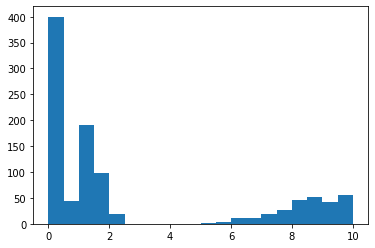

In [155]:
# 3.4)  use the distribution plot to visualize the sessions' lengths (minutes)
sessions_lengths_minutes = []
for session in all_sessions:
    sessions_lengths_minutes.append((session.endTime - session.startTime) / 60)


plt.hist(sessions_lengths_minutes, 20)
plt.plot()


[]

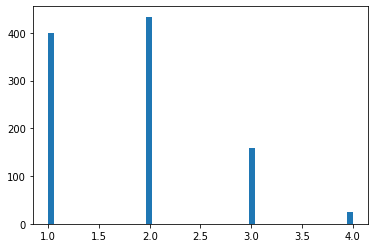

In [156]:
#3.5) use the distribution plot to visualize the sessions' lengths (the number of requests) 
sessions_lengths = []
for session in all_sessions:
    sessions_lengths.append(len(session.requests))

plt.hist(sessions_lengths, 50)
plt.plot()



[]

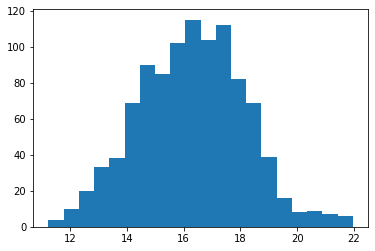

In [157]:
#3.6) use the distribution plot to visualize sessions' starting times (hours). <br>
sessions_starting_times = []
for session in all_sessions:
    sessions_starting_times.append(session.startTime / 3600)

plt.hist(sessions_starting_times, 20)
plt.plot()


{'AddProduct.html': 248, 'Shop.html': 504, 'Summary.html': 96, 'Payment.html': 75, 'Contact.html': 79, 'About.html': 10}


(array([ 0,  5, 10, 15, 20, 25]),
 [Text(0, 0, 'AddProduct.html'),
  Text(5, 0, 'Shop.html'),
  Text(10, 0, 'Summary.html'),
  Text(15, 0, 'Payment.html'),
  Text(20, 0, 'Contact.html'),
  Text(25, 0, 'About.html')])

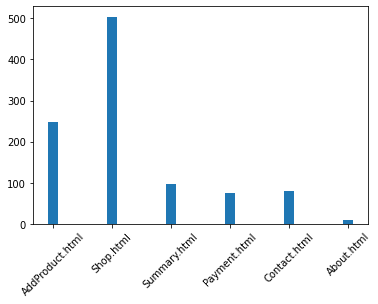

In [158]:
#3.7) which web page is the most common entry point?; for each page plot the number of times it has been an entry page,  <br>
sessions_entry_points = {}
for session in all_sessions:
    if session.requests[0].page not in sessions_entry_points:
        sessions_entry_points[session.requests[0].page] = 0
    else:
        sessions_entry_points[session.requests[0].page] += 1

print(sessions_entry_points)
x = (range(len(sessions_entry_points)))
plt.bar([5*i for i in x], list(sessions_entry_points.values()), tick_label=list(sessions_entry_points.keys()), width=0.8)
plt.xticks(rotation=45)

{'AddProduct.html': 319, 'Payment.html': 163, 'Summary.html': 160, 'About.html': 216, 'Contact.html': 121, 'Shop.html': 33}


(array([ 0,  5, 10, 15, 20, 25]),
 [Text(0, 0, 'AddProduct.html'),
  Text(5, 0, 'Payment.html'),
  Text(10, 0, 'Summary.html'),
  Text(15, 0, 'About.html'),
  Text(20, 0, 'Contact.html'),
  Text(25, 0, 'Shop.html')])

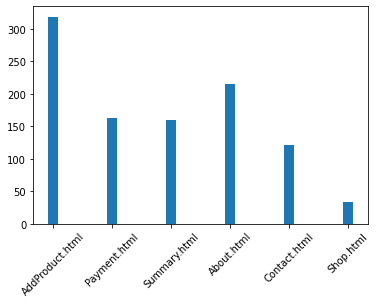

In [159]:
#3.8) which web page is the most common departure point?; for each page plot the number of times the user stopped a session while being on this page, <br>
sessions_departure_points = {}
for session in all_sessions:
    if session.requests[-1].page not in sessions_departure_points:
        sessions_departure_points[session.requests[-1].page] = 0
    else:
        sessions_departure_points[session.requests[-1].page] += 1

print(sessions_departure_points)
x = (range(len(sessions_departure_points)))
plt.bar([5*i for i in x], list(sessions_departure_points.values()), tick_label=list(sessions_departure_points.keys()), width=0.8)
plt.xticks(rotation=45)

{'AddProduct.html': 44342671, 'Shop.html': 42117013, 'Summary.html': 20855193, 'Payment.html': 16571814, 'About.html': 20533134, 'Contact.html': 12307714}
{'AddProduct.html': 61078.059228650134, 'Shop.html': 61039.14927536232, 'Summary.html': 61519.74336283186, 'Payment.html': 61835.12686567164, 'About.html': 61110.517857142855, 'Contact.html': 61538.57}


(array([ 0,  5, 10, 15, 20, 25]),
 [Text(0, 0, 'AddProduct.html'),
  Text(5, 0, 'Shop.html'),
  Text(10, 0, 'Summary.html'),
  Text(15, 0, 'Payment.html'),
  Text(20, 0, 'About.html'),
  Text(25, 0, 'Contact.html')])

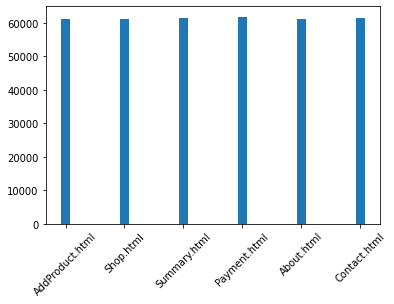

In [162]:
pages = {}
avg_time_pages = {}
#3.9) for each page plot the average time the user stayed on this page <br>
for el in reqs:
    if el.page in pages:
        pages[el.page].append(el)
        avg_time_pages[el.page] += el.time
    else:
        pages[el.page] = [el]
        avg_time_pages[el.page] = el.time

print(avg_time_pages)
for key, value in avg_time_pages.items():
    avg_time_pages[key] /= len(pages[key])

print(avg_time_pages)
x = (range(len(avg_time_pages)))
plt.bar([5*i for i in x], list(avg_time_pages.values()), tick_label=list(avg_time_pages.keys()), width=0.8)
plt.xticks(rotation=45)

In [191]:
#3.10) print the first 10 sessions (paths). <br>
for i, session in enumerate(all_sessions[0:10]):
    print("Session ", i+1, ":", end=" ")
    for request in session.requests:
        print(request.page + " -->", end=" ")
        
    print("\n")


Session  1 : AddProduct.html --> 

Session  2 : Shop.html --> AddProduct.html --> 

Session  3 : Summary.html --> Payment.html --> 

Session  4 : Shop.html --> AddProduct.html --> 

Session  5 : Summary.html --> 

Session  6 : Shop.html --> AddProduct.html --> Summary.html --> 

Session  7 : Shop.html --> AddProduct.html --> Summary.html --> Payment.html --> 

Session  8 : Shop.html --> AddProduct.html --> Summary.html --> Payment.html --> 

Session  9 : AddProduct.html --> 

Session  10 : Summary.html --> 

